In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
# read excel file 
x1 = pd.ExcelFile('lendingClub2.xls')
data = x1.parse("Cleansed_Data_20180420")

# display the first 5 rows
data.head()

,Loan_Amnt,annual_inc,dti,Grade_Ord,Emp_Length_Ord,Home_Own_Mortage,Home_Rent_Other,Verification_Status_Yes,Verification_Status_No,Term_36,...,Delinq_2Yrs_No,Years_Since_CR_Line,mths_since_last_delinq,revol_bal,revol_util,open_acc,total_acc,pub_rec,pub_rec_bankruptcies,Loan_Status_Final
0,5000,24000.0,27.65,2,10.0,0,1,1,0,1,...,1,26,0,13648,83.7,3,9,0,0,0
1,2500,30000.0,1.00,3,0.5,0,1,1,0,0,...,1,12,0,1687,9.4,3,4,0,0,1
2,2400,12252.0,8.72,3,10.0,0,1,0,1,1,...,1,10,0,2956,98.5,2,10,0,0,0
3,10000,49200.0,20.00,3,10.0,0,1,1,0,1,...,1,15,35,5598,21.0,10,37,0,0,0
4,3000,80000.0,17.94,2,1.0,0,1,1,0,0,...,1,15,38,27783,53.9,15,38,0,0,0


In [3]:
data.shape

(40470, 37)

In [4]:
from sklearn.preprocessing import StandardScaler

y = data.Loan_Status_Final.values
X = data.drop(['Loan_Status_Final', 'Purpose'], axis=1)

ScaledX = StandardScaler().fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn import svm
from sklearn.model_selection import GridSearchCV

sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(ScaledX, y)

X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, random_state=42)

linearSVC = svm.LinearSVC(C=1)
linearSVC.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

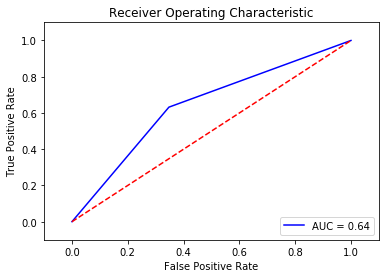

In [6]:
from sklearn import metrics
y_pred = linearSVC.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
gaussSVC = svm.SVC(kernel='rbf', gamma=2, C=1)
gaussSVC.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

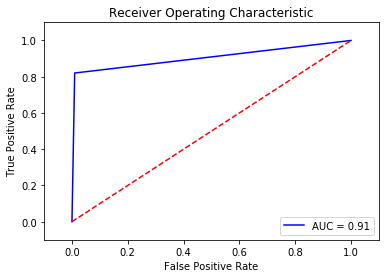

In [8]:
y_pred = gaussSVC.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.grid_search import GridSearchCV

param_grid = {'kernel':['linear', 'poly', 'rbf'],'C': [0.1, 1, 10], 'gamma': [0.1, 1, 5, 10], 'degree': [2, 3, 4]}

grid = GridSearchCV(svm.SVC(random_state=0), param_grid, cv=10, n_jobs=3, pre_dispatch=6)
grid.fit(X_train_res,y_train_res)